In [7]:
import math
import numpy as np
import os
import random
import tensorflow as tf
from matplotlib import pyplot as plt
from six.moves import range
from sklearn.manifold import TSNE

import collections

ImportError: No module named 'tensorflow'

In [9]:
# dataset 
filename = 'text8'
with open(filename,'rb') as f:
    data = str(f.read()).split()

In [15]:
with open('text8_mini.dat','w') as f:
    

['anarchism',
 'originated',
 'as',
 'a',
 'term',
 'of',
 'abuse',
 'first',
 'used',
 'against',
 'early',
 'working',
 'class',
 'radicals',
 'including',
 'the',
 'diggers',
 'of',
 'the',
 'english',
 'revolution',
 'and',
 'the',
 'sans',
 'culottes',
 'of',
 'the',
 'french',
 'revolution',
 'whilst',
 'the',
 'term',
 'is',
 'still',
 'used',
 'in',
 'a',
 'pejorative',
 'way',
 'to',
 'describe',
 'any',
 'act',
 'that',
 'used',
 'violent',
 'means',
 'to',
 'destroy',
 'the',
 'organization',
 'of',
 'society',
 'it',
 'has',
 'also',
 'been',
 'taken',
 'up',
 'as',
 'a',
 'positive',
 'label',
 'by',
 'self',
 'defined',
 'anarchists',
 'the',
 'word',
 'anarchism',
 'is',
 'derived',
 'from',
 'the',
 'greek',
 'without',
 'archons',
 'ruler',
 'chief',
 'king',
 'anarchism',
 'as',
 'a',
 'political',
 'philosophy',
 'is',
 'the',
 'belief',
 'that',
 'rulers',
 'are',
 'unnecessary',
 'and',
 'should',
 'be',
 'abolished',
 'although',
 'there',
 'are',
 'differing',
 '

In [4]:
# Build a vocabulary
#  Required : indices, count, dictionary, reverse_dictionary
vocab_size = 5000
count = [['UNK',-1]]
count.extend(collections.Counter(data).most_common(vocab_size-1))

In [5]:
# Dictionary
wdict = {}
for word,_ in count:
    wdict[word] = len(wdict)

In [6]:
'''
Variables

[1] count   : list(list) -> [['word',count], ...]
[2] indices : list -> list of indices of words in vocab
[3] wdict   : dict -> 'word' to index
[4] rwdict  : dict -> index  to 'word'

'''
indices = []
unk_count = 0
for word in data:
    if word in wdict:
        index = wdict[word]
    else:
        index = 0
        unk_count += 1
    indices.append(index)
count[0][1] = unk_count
# reverse dictionary
rwdict = dict(zip(wdict.values(), wdict.keys()))

In [36]:
batch_size = 8
num_skips = 2 
skip_window = 1

batch = np.ndarray(shape=(batch_size), dtype=np.int32)
labels = np.ndarray(shape=(batch_size, 1), dtype=np.int32)
span = 2 * skip_window + 1
buffer = collections.deque(maxlen=span)

In [37]:
data_index = 0
for _ in range(span):
    buffer.append(indices[data_index])
    data_index = (data_index + 1) % len(indices)

In [38]:
buffer

deque([0, 3084, 12])

In [35]:
for i in range(batch_size // num_skips):
    target = skip_window  # target label at the center of the buffer
    targets_to_avoid = [ skip_window ]
    print '>i',i
    print 'target',target
    print 'targets_to_avoid',targets_to_avoid
    for j in range(num_skips):
        print '>j',j
        while target in targets_to_avoid:
            target = random.randint(0, span - 1)
            print 'target',target
        print 'targets_to_avoid',targets_to_avoid
        targets_to_avoid.append(target)
        print 'targets_to_avoid',targets_to_avoid
        
        batch[i * num_skips + j] = buffer[skip_window]
        labels[i * num_skips + j, 0] = buffer[target]
        print 'batch [%d * %d + %d]'%(i,num_skips,j)
        print 'labels[%d * %d + %d]'%(i,num_skips,j)
        print 'batch',batch
        print 'labels', labels
        print '======================================'
    
    buffer.append(indices[data_index])
    print 'buffer',buffer
    data_index = (data_index + 1) % len(data)
    print 'data_index',data_index
    print '--------------------------------------'

>i 0
target 1
targets_to_avoid [1]
>j 0
target 1
target 0
targets_to_avoid [1]
targets_to_avoid [1, 0]
batch [0 * 2 + 0]
labels[0 * 2 + 0]
batch [   2 3084   12   12    6    6  195  195]
labels [[ 195]
 [   0]
 [   6]
 [3084]
 [ 195]
 [  12]
 [   2]
 [   6]]
>j 1
target 1
target 1
target 2
targets_to_avoid [1, 0]
targets_to_avoid [1, 0, 2]
batch [0 * 2 + 1]
labels[0 * 2 + 1]
batch [  2   2  12  12   6   6 195 195]
labels [[ 195]
 [3137]
 [   6]
 [3084]
 [ 195]
 [  12]
 [   2]
 [   6]]
buffer deque([2, 3137, 46], maxlen=3)
data_index 8
--------------------------------------
>i 1
target 1
targets_to_avoid [1]
>j 0
target 0
targets_to_avoid [1]
targets_to_avoid [1, 0]
batch [1 * 2 + 0]
labels[1 * 2 + 0]
batch [   2    2 3137   12    6    6  195  195]
labels [[ 195]
 [3137]
 [   2]
 [3084]
 [ 195]
 [  12]
 [   2]
 [   6]]
>j 1
target 0
target 0
target 0
target 2
targets_to_avoid [1, 0]
targets_to_avoid [1, 0, 2]
batch [1 * 2 + 1]
labels[1 * 2 + 1]
batch [   2    2 3137 3137    6    6  195 

In [34]:
print batch_size//num_skips
print 'skip_window', skip_window
print 'num_skips', num_skips
print 'targets_to_avoid',targets_to_avoid
print 'buffer',[ rwdict[id] for id in list(buffer) ]

print '\nspan',span

4
skip_window 1
num_skips 2
targets_to_avoid [1, 2, 0]
buffer ['term', 'of', 'abuse']

span 3


In [24]:
print [rwdict[id] for id in batch]
print [rwdict[id] for id in labels.reshape(batch_size)]

['originated', 'originated', 'as', 'as', 'a', 'a', 'term', 'term']
['as', 'UNK', 'a', 'originated', 'term', 'as', 'of', 'a']


In [40]:
data_index = 0

def generate_batch(batch_size, num_skips, skip_window):
    global data_index
    assert batch_size % num_skips == 0
    assert num_skips <= 2 * skip_window
    batch = np.ndarray(shape=(batch_size), dtype=np.int32)
    labels = np.ndarray(shape=(batch_size, 1), dtype=np.int32)
    span = 2 * skip_window + 1 # [ skip_window target skip_window ]
    buffer = collections.deque(maxlen=span)
    for _ in range(span):
        buffer.append(indices[data_index])
        data_index = (data_index + 1) % len(indices)
    for i in range(batch_size // num_skips):
        target = skip_window  # target label at the center of the buffer
        targets_to_avoid = [ skip_window ]
        for j in range(num_skips):
            while target in targets_to_avoid:
                target = random.randint(0, span - 1)
            targets_to_avoid.append(target)
            batch[i * num_skips + j] = buffer[skip_window]
            labels[i * num_skips + j, 0] = buffer[target]
        buffer.append(indices[data_index])
        data_index = (data_index + 1) % len(indices)
    return batch, labels

print('indices:', [rwdict[di] for di in indices[:8]])

for num_skips, skip_window in [(2, 1), (4, 2)]:
    data_index = 0
    batch, labels = generate_batch(batch_size=8, num_skips=num_skips, skip_window=skip_window)
    print('\nwith num_skips = %d and skip_window = %d:' % (num_skips, skip_window))
    print('    batch:', [rwdict[bi] for bi in batch])
    print('    labels:', [rwdict[li] for li in labels.reshape(8)])

('indices:', ['UNK', 'originated', 'as', 'a', 'term', 'of', 'abuse', 'first'])

with num_skips = 2 and skip_window = 1:
('    batch:', ['originated', 'originated', 'as', 'as', 'a', 'a', 'term', 'term'])
('    labels:', ['UNK', 'as', 'a', 'originated', 'term', 'as', 'of', 'a'])

with num_skips = 4 and skip_window = 2:
('    batch:', ['as', 'as', 'as', 'as', 'a', 'a', 'a', 'a'])
('    labels:', ['originated', 'UNK', 'a', 'term', 'of', 'originated', 'term', 'as'])


In [41]:
batch_size = 128
embedding_size = 128 # Dimension of the embedding vector.
skip_window = 1 # How many words to consider left and right.
num_skips = 2 # How many times to reuse an input to generate a label.
# We pick a random validation set to sample nearest neighbors. here we limit the
# validation samples to the words that have a low numeric ID, which by
# construction are also the most frequent. 
valid_size = 16 # Random set of words to evaluate similarity on.
valid_window = 100 # Only pick dev samples in the head of the distribution.
valid_examples = np.array(random.sample(range(valid_window), valid_size))
num_sampled = 64 # Number of negative examples to sample.

In [42]:
# Input data.
train_dataset = tf.placeholder(tf.int32, shape=[batch_size])
train_labels = tf.placeholder(tf.int32, shape=[batch_size, 1])
valid_dataset = tf.constant(valid_examples, dtype=tf.int32)

In [44]:
# Variables.
embeddings = tf.Variable(tf.random_uniform([vocab_size, embedding_size], -1.0, 1.0))
softmax_weights = tf.Variable(tf.truncated_normal([vocab_size, embedding_size],stddev=1.0 / math.sqrt(embedding_size)))
softmax_biases = tf.Variable(tf.zeros([vocab_size]))

In [46]:
# Model.
# Look up embeddings for inputs.
embed = tf.nn.embedding_lookup(embeddings, train_dataset)
# Compute the softmax loss, using a sample of the negative labels each time.
loss = tf.reduce_mean(tf.nn.sampled_softmax_loss(softmax_weights, softmax_biases, embed,train_labels, num_sampled, vocab_size))

In [47]:
# Optimizer.
# Note: The optimizer will optimize the softmax_weights AND the embeddings.
# This is because the embeddings are defined as a variable quantity and the
# optimizer's `minimize` method will by default modify all variable quantities 
# that contribute to the tensor it is passed.
# See docs on `tf.train.Optimizer.minimize()` for more details.
optimizer = tf.train.AdagradOptimizer(1.0).minimize(loss)

In [48]:
# ????????
# Compute the similarity between minibatch examples and all embeddings.
# We use the cosine distance:
norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), 1, keep_dims=True))
normalized_embeddings = embeddings / norm
valid_embeddings = tf.nn.embedding_lookup(normalized_embeddings, valid_dataset)
similarity = tf.matmul(valid_embeddings, tf.transpose(normalized_embeddings))

In [51]:
num_steps = 100001

with tf.Session() as session:
    tf.initialize_all_variables().run()
    print('Initialized')
    average_loss = 0
    for step in range(num_steps):
        batch_data, batch_labels = generate_batch(batch_size, num_skips, skip_window)
        feed_dict = {train_dataset : batch_data, train_labels : batch_labels}
        _, l = session.run([optimizer, loss], feed_dict=feed_dict)
        average_loss += l
        if step % 2000 == 0:
            if step > 0:
                average_loss = average_loss / 2000
                # The average loss is an estimate of the loss over the last 2000 batches.
                print('Average loss at step %d: %f' % (step, average_loss))
                average_loss = 0
        # note that this is expensive (~20% slowdown if computed every 500 steps)
        if step % 10000 == 0:
            sim = similarity.eval()
            for i in range(valid_size):
                valid_word = rwdict[valid_examples[i]]
                top_k = 8 # number of nearest neighbors
                nearest = (-sim[i, :]).argsort()[1:top_k+1]
                log = 'Nearest to %s:' % valid_word
                for k in range(top_k):
                    close_word = rwdict[nearest[k]]
                    log = '%s %s,' % (log, close_word)
                print(log)
    final_embeddings = normalized_embeddings.eval()

Initialized
Nearest to no: denied, minority, broadcasting, muslims, nova, peak, sites, room,
Nearest to new: fictional, explosive, still, elsewhere, late, justice, croatia, big,
Nearest to i: beliefs, naval, whose, artistic, attempts, table, concluded, technological,
Nearest to all: follow, recipient, europe, forum, after, supposedly, scheme, engineers,
Nearest to so: coins, atmosphere, networks, wings, mother, diagram, chris, places,
Nearest to with: obsolete, meters, ce, during, protein, described, artistic, illustrated,
Nearest to this: sexual, relief, confederate, cross, eric, princeton, accused, environmental,
Nearest to two: parties, fishing, equation, substance, foods, it, forest, january,
Nearest to when: conventional, mickey, holes, partners, funds, death, kilometers, occur,
Nearest to that: runner, since, sole, genetics, feast, fifty, includes, process,
Nearest to the: ones, extend, session, width, cpu, goes, situations, cancer,
Nearest to to: quick, treaty, formula, alice, f

In [52]:
num_points = 400

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
two_d_embeddings = tsne.fit_transform(final_embeddings[1:num_points+1, :])

In [54]:
from matplotlib import pylab

def plot(embeddings, labels):
    assert embeddings.shape[0] >= len(labels), 'More labels than embeddings'
    pylab.figure(figsize=(15,15))  # in inches
    for i, label in enumerate(labels):
        x, y = embeddings[i,:]
        pylab.scatter(x, y)
        pylab.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points',
                   ha='right', va='bottom')
    pylab.show()

%matplotlib inline

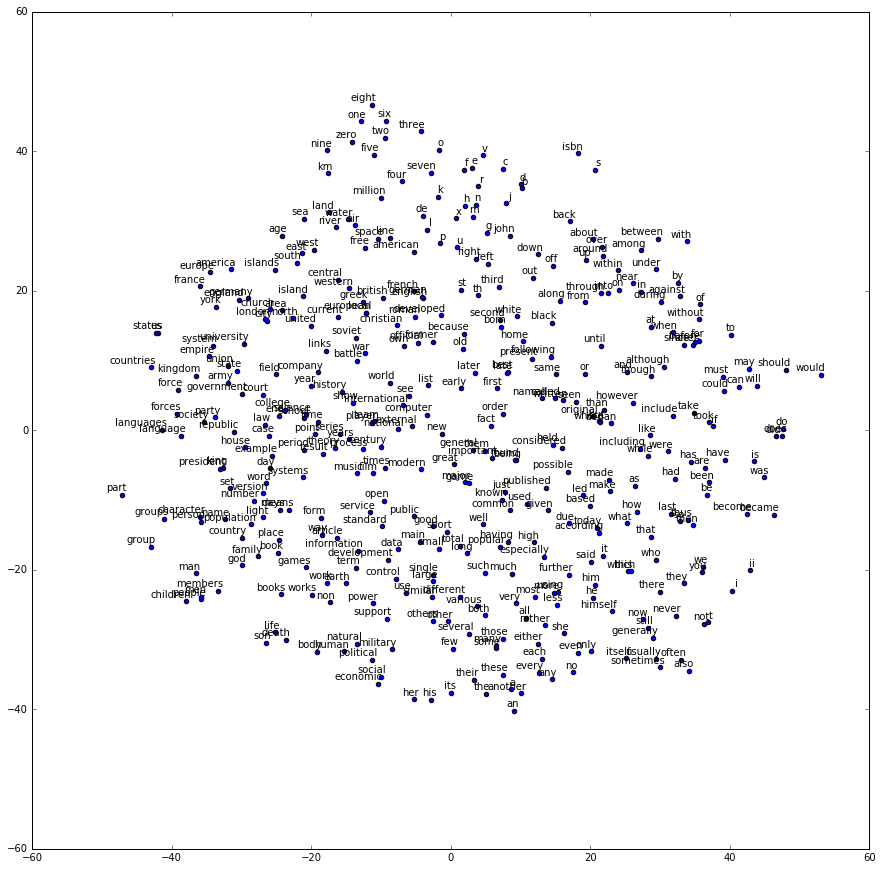

In [55]:
words = [rwdict[i] for i in range(1, num_points+1)]
plot(two_d_embeddings, words)